In [1]:
import numpy as np

In [79]:
#Importing relevant packages

import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
%matplotlib inline

In [2]:
import pandas as pd

In [8]:
import tensorflow as tf

In [9]:
from keras.models import Model
from keras.layers import Input,Dense

Using TensorFlow backend.


In [12]:
data = pd.read_csv('PCACleaned.csv')
data.head(5)

,Unnamed: 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0,0.193006,-0.178577,0.170396,-0.148481,0.077999,0.003330,0.042243,0.045775,-0.481609,-0.500840
1,1,9.186932,37.776527,-0.669596,23.420014,-12.254110,-24.667015,45.828558,-8.714144,-127.696794,44.200079
2,2,0.006399,0.098318,-0.010249,-0.145782,-0.186742,-0.118273,-0.077700,-0.118401,-0.644344,0.186665
3,3,0.009803,-0.055726,0.006777,-0.158278,-0.101630,0.004896,-0.080329,-0.085339,-0.335105,0.025227
4,4,4.399029,-0.881844,-1.146842,-1.947550,2.985877,3.113468,3.651127,-2.933898,-3.915111,-4.861582


In [22]:
fraudscores = pd.read_csv('newScore1Zscores.csv')
fraudscores = fraudscores.iloc[:,1:]
fraudscores.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1
0,0.193006,-0.178577,0.170396,-0.148481,0.077999,0.003330,0.042243,0.045775,-0.481609,-0.500840,0.782934
1,9.186932,37.776527,-0.669596,23.420014,-12.254110,-24.667015,45.828558,-8.714144,-127.696794,44.200079,152.497039
2,0.006399,0.098318,-0.010249,-0.145782,-0.186742,-0.118273,-0.077700,-0.118401,-0.644344,0.186665,0.741623
3,0.009803,-0.055726,0.006777,-0.158278,-0.101630,0.004896,-0.080329,-0.085339,-0.335105,0.025227,0.406595
4,4.399029,-0.881844,-1.146842,-1.947550,2.985877,3.113468,3.651127,-2.933898,-3.915111,-4.861582,10.234648


In [14]:
data1 = data.iloc[:,1:]
train = data1.values

In [16]:
#data1.head(5)
#train

In [15]:
input_size = 10
hidden_size = 5
code_size = 3

#autoencoder
input_layer = Input(shape=(input_size,)) 
hidden_1 = Dense(hidden_size, activation='relu')(input_layer)
code = Dense(code_size,activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_layer = Dense(input_size, activation='tanh')(hidden_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [16]:
output=autoencoder.fit(train,train, epochs=30) #ran 30 times

Epoch 1/30
1070994/1070994 [==============================] - 53s 49us/step - loss: 0.9624 - acc: 0.5257 0s - loss: 0.9635 - acc: 0.52
Epoch 2/30
1070994/1070994 [==============================] - 50s 47us/step - loss: 0.9566 - acc: 0.5536
Epoch 3/30
1070994/1070994 [==============================] - 54s 50us/step - loss: 0.9562 - acc: 0.5556
Epoch 4/30
1070994/1070994 [==============================] - 56s 52us/step - loss: 0.9561 - acc: 0.5688
Epoch 5/30
1070994/1070994 [==============================] - 57s 53us/step - loss: 0.9560 - acc: 0.5743
Epoch 6/30
1070994/1070994 [==============================] - 56s 52us/step - loss: 0.9559 - acc: 0.5787
Epoch 7/30
1070994/1070994 [==============================] - 56s 52us/step - loss: 0.9558 - acc: 0.5831
Epoch 8/30
1070994/1070994 [==============================] - 55s 51us/step - loss: 0.9558 - acc: 0.5777
Epoch 9/30
1070994/1070994 [==============================] - 51s 47us/step - loss: 0.9560 - acc: 0.5806
Epoch 10/30
1070994/10709

In [18]:
store = autoencoder.predict(train)

In [109]:
store = pd.DataFrame(store) #Predicted value of inputs with the help of autoencoder
store.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-0.012943,-0.010615,-0.002761,-0.131009,-0.119575,-0.073335,0.065802,-0.049514,-0.318825,0.120254
1,1.000000,1.000000,0.994718,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
2,-0.017591,0.117058,-0.011052,-0.095100,-0.191137,-0.130467,-0.049046,-0.109578,-0.673669,0.216389
3,-0.024969,-0.067934,-0.002884,-0.159701,-0.077389,-0.009447,-0.092179,-0.054620,-0.386887,0.127814
4,0.915007,-0.999992,0.662176,-0.553174,0.999998,0.983535,1.000000,-0.776178,-0.999982,1.000000


In [26]:
euclidean = (((store - pd.DataFrame(train)).abs())**2).sum(axis=1) #calculating euclidean distance (n =2)
euclidean_score = euclidean**(1/2)

In [31]:
euclidean_score=pd.DataFrame(euclidean_score)
euclidean_score.head()

,0
0,0.753471
1,150.330237
2,0.079412
3,0.128594
4,8.966041


In [57]:
fraudscores['Score2'] = euclidean_score
fraudscores.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1,Score2
0,0.193006,-0.178577,0.170396,-0.148481,0.077999,0.003330,0.042243,0.045775,-0.481609,-0.500840,0.782934,0.753471
1,9.186932,37.776527,-0.669596,23.420014,-12.254110,-24.667015,45.828558,-8.714144,-127.696794,44.200079,152.497039,150.330237
2,0.006399,0.098318,-0.010249,-0.145782,-0.186742,-0.118273,-0.077700,-0.118401,-0.644344,0.186665,0.741623,0.079412
3,0.009803,-0.055726,0.006777,-0.158278,-0.101630,0.004896,-0.080329,-0.085339,-0.335105,0.025227,0.406595,0.128594
4,4.399029,-0.881844,-1.146842,-1.947550,2.985877,3.113468,3.651127,-2.933898,-3.915111,-4.861582,10.234648,8.966041


In [58]:
fraudscores['Score2'].describe()

count    1.070994e+06
mean     1.572802e-01
std      3.085486e+00
min      1.067752e-02
25%      4.023667e-02
50%      5.348471e-02
75%      7.634354e-02
max      1.025473e+03
Name: Score2, dtype: float64

In [59]:
fraudscores2 = fraudscores.sort_values(by = 'Score1', ascending = True)#sorting values in ascending order according to score 1
fraudscores2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1,Score2
266556,-0.022028,-0.028335,-0.005520,0.008697,-0.029255,0.032488,0.012111,0.021724,0.033674,-0.022180,0.074499,0.149156
278955,-0.023124,-0.038692,-0.006436,0.022766,-0.001924,0.046993,-0.026345,-0.002690,-0.006249,0.005259,0.074642,0.098858
278952,-0.023124,-0.038692,-0.006436,0.022766,-0.001924,0.046993,-0.026345,-0.002690,-0.006249,0.005259,0.074642,0.098858
278953,-0.020465,-0.030773,-0.006183,0.040631,0.006498,0.047422,-0.017250,-0.001849,0.006290,0.002345,0.075445,0.109176
278950,-0.020465,-0.030773,-0.006183,0.040631,0.006498,0.047422,-0.017250,-0.001849,0.006290,0.002345,0.075445,0.109176


In [60]:
for i in range(len(fraudscores2)):   #rank order for score 1 in ascending order
    fraudscores2.iloc[i,10] = i+1
fraudscores2.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1,Score2
266556,-0.022028,-0.028335,-0.005520,0.008697,-0.029255,0.032488,0.012111,0.021724,0.033674,-0.022180,1.0,0.149156
278955,-0.023124,-0.038692,-0.006436,0.022766,-0.001924,0.046993,-0.026345,-0.002690,-0.006249,0.005259,2.0,0.098858
278952,-0.023124,-0.038692,-0.006436,0.022766,-0.001924,0.046993,-0.026345,-0.002690,-0.006249,0.005259,3.0,0.098858
278953,-0.020465,-0.030773,-0.006183,0.040631,0.006498,0.047422,-0.017250,-0.001849,0.006290,0.002345,4.0,0.109176
278950,-0.020465,-0.030773,-0.006183,0.040631,0.006498,0.047422,-0.017250,-0.001849,0.006290,0.002345,5.0,0.109176


In [61]:
fraudscores3 = fraudscores2.sort_values(by = 'Score2', ascending = True)#sorting values according to the score 2 (ascending)
fraudscores3.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1,Score2
740665,-0.014549,-0.042343,-0.001125,0.006841,0.055194,0.045384,-0.094767,-0.001477,0.013415,-0.011766,92446.0,0.010678
706777,-0.019026,-0.054517,-0.001402,-0.024554,0.031474,0.039141,-0.094591,-0.001374,0.004452,-0.007041,71145.0,0.010938
702913,-0.015007,-0.041234,-0.001707,0.005353,0.049385,0.045346,-0.090853,0.001108,0.034070,-0.014504,83733.0,0.011314
725940,-0.015116,-0.039558,-0.002209,0.009804,0.050729,0.049151,-0.094687,-0.000706,0.017356,-0.012346,88852.0,0.011319
696952,-0.013216,-0.036636,-0.001557,0.024324,0.066697,0.052009,-0.096869,-0.001191,0.025137,-0.013435,201143.0,0.011328


In [62]:
for j in range(len(fraudscores3)):    #rank ordering in ascending order according to score 2
    fraudscores3.iloc[j,11] = j+1
fraudscores3.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1,Score2
740665,-0.014549,-0.042343,-0.001125,0.006841,0.055194,0.045384,-0.094767,-0.001477,0.013415,-0.011766,92446.0,1.0
706777,-0.019026,-0.054517,-0.001402,-0.024554,0.031474,0.039141,-0.094591,-0.001374,0.004452,-0.007041,71145.0,2.0
702913,-0.015007,-0.041234,-0.001707,0.005353,0.049385,0.045346,-0.090853,0.001108,0.034070,-0.014504,83733.0,3.0
725940,-0.015116,-0.039558,-0.002209,0.009804,0.050729,0.049151,-0.094687,-0.000706,0.017356,-0.012346,88852.0,4.0
696952,-0.013216,-0.036636,-0.001557,0.024324,0.066697,0.052009,-0.096869,-0.001191,0.025137,-0.013435,201143.0,5.0


In [71]:
fraudscores3['Cumulative score'] = fraudscores3['Score1'] + fraudscores3['Score2']
fraudscores3.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1,Score2,Cumulative score
740665,-0.014549,-0.042343,-0.001125,0.006841,0.055194,0.045384,-0.094767,-0.001477,0.013415,-0.011766,92446.0,1.0,92447.0
706777,-0.019026,-0.054517,-0.001402,-0.024554,0.031474,0.039141,-0.094591,-0.001374,0.004452,-0.007041,71145.0,2.0,71147.0
702913,-0.015007,-0.041234,-0.001707,0.005353,0.049385,0.045346,-0.090853,0.001108,0.034070,-0.014504,83733.0,3.0,83736.0
725940,-0.015116,-0.039558,-0.002209,0.009804,0.050729,0.049151,-0.094687,-0.000706,0.017356,-0.012346,88852.0,4.0,88856.0
696952,-0.013216,-0.036636,-0.001557,0.024324,0.066697,0.052009,-0.096869,-0.001191,0.025137,-0.013435,201143.0,5.0,201148.0


In [70]:
fraudscores3.dtypes

principal component 1     float64
principal component 2     float64
principal component 3     float64
principal component 4     float64
principal component 5     float64
principal component 6     float64
principal component 7     float64
principal component 8     float64
principal component 9     float64
principal component 10    float64
Score1                    float64
Score2                    float64
Cumulative score          float64
dtype: object

In [75]:
fraudscores4 = fraudscores3.sort_values(by = 'Cumulative score', ascending = False)
fraudscores4.head(20)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Score1,Score2,Cumulative score
632815,755.508212,-355.196558,-513.273231,170.870764,-128.076154,-109.357792,-36.858902,-110.148198,-39.345248,-137.509298,1070994.0,1070994.0,2141988.0
935157,160.083481,-95.681312,160.107421,178.823987,-206.981878,-270.047471,-258.621769,419.943366,217.576913,708.828690,1070993.0,1070993.0,2141986.0
565391,395.298447,704.862769,-15.239715,-430.507155,-11.917871,-8.086626,-306.137445,1.922871,23.459084,13.083338,1070992.0,1070992.0,2141984.0
1067359,65.953900,380.157384,-43.805614,691.997368,216.105653,273.891559,-116.523254,25.026612,4.770998,-43.265146,1070991.0,1070991.0,2141982.0
585438,180.094748,-76.413509,422.388666,77.217354,83.925126,-169.356741,-10.020582,521.030419,-186.688065,-370.891266,1070990.0,1070990.0,2141980.0
585117,233.976327,-100.054100,557.232264,107.292399,-170.938705,47.279974,-67.742346,-448.260293,79.880614,17.262845,1070989.0,1070989.0,2141978.0
917941,179.907228,-19.380735,190.886861,-53.461213,-321.708827,388.235757,175.957338,420.462015,-100.664933,-238.400231,1070988.0,1070988.0,2141976.0
85885,196.683445,-29.249124,28.035591,-215.521061,283.358380,398.401304,280.865209,75.367709,64.473206,314.622333,1070987.0,1070987.0,2141974.0
585119,174.078825,-66.175151,435.094358,44.013588,-80.540667,98.245060,-2.002265,-380.782138,66.700072,46.028365,1070986.0,1070986.0,2141972.0
920627,89.213525,-27.727643,89.197921,-34.206621,424.681490,-245.093451,39.076392,32.471812,41.916292,48.695599,1070985.0,1070985.0,2141970.0


In [76]:
fraudscores4.to_csv("CumulativeRankOrderScores.csv")

In [77]:
fraudscores2.to_csv("ZScore1AndScore2.csv")

<function matplotlib.pyplot.show(*args, **kw)>

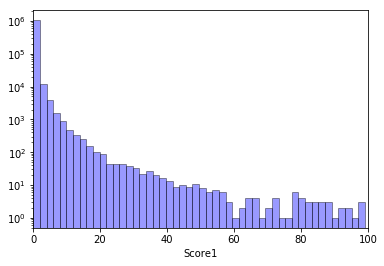

In [104]:
xhigh = 100
plt.xlim(0,xhigh)
fg = fraudscores[fraudscores['Score1'] <= xhigh]
ax= sns.distplot(fg['Score1'],bins = 50,kde = False, hist = True,
             color = 'blue', hist_kws={'edgecolor':'black'})
ax.set_yscale('log')
#plt.xticks([0, 400000, 800000, 1200000, 1600000,2000000])
#fullgraph.set_yscale('log')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

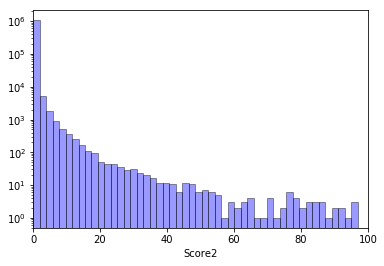

In [105]:
xhigh = 100
plt.xlim(0,xhigh)
fg = fraudscores[fraudscores['Score2'] <= xhigh]
ax = sns.distplot(fg['Score2'],bins = 50,kde = False, hist = True,
             color = 'blue', hist_kws={'edgecolor':'black'})
ax.set_yscale('log')
#plt.xticks([0, 400000, 800000, 1200000, 1600000,2000000])
#fullgraph.set_yscale('log')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

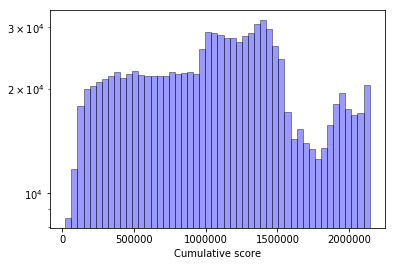

In [108]:
ax = sns.distplot(fraudscores4['Cumulative score'],\
             bins = 50, kde = False, hist = True, color = 'blue', hist_kws={'edgecolor':'black'})
ax.set_yscale('log')
plt.show